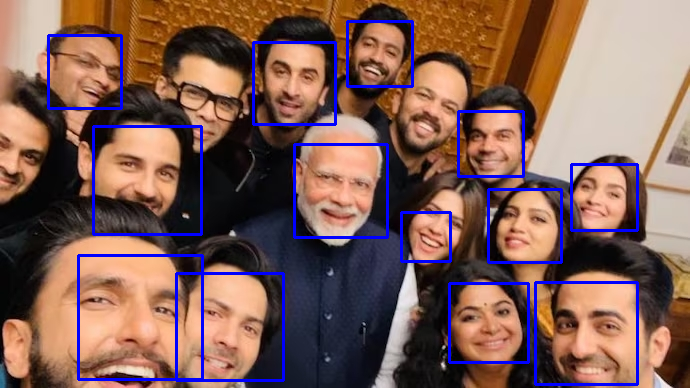

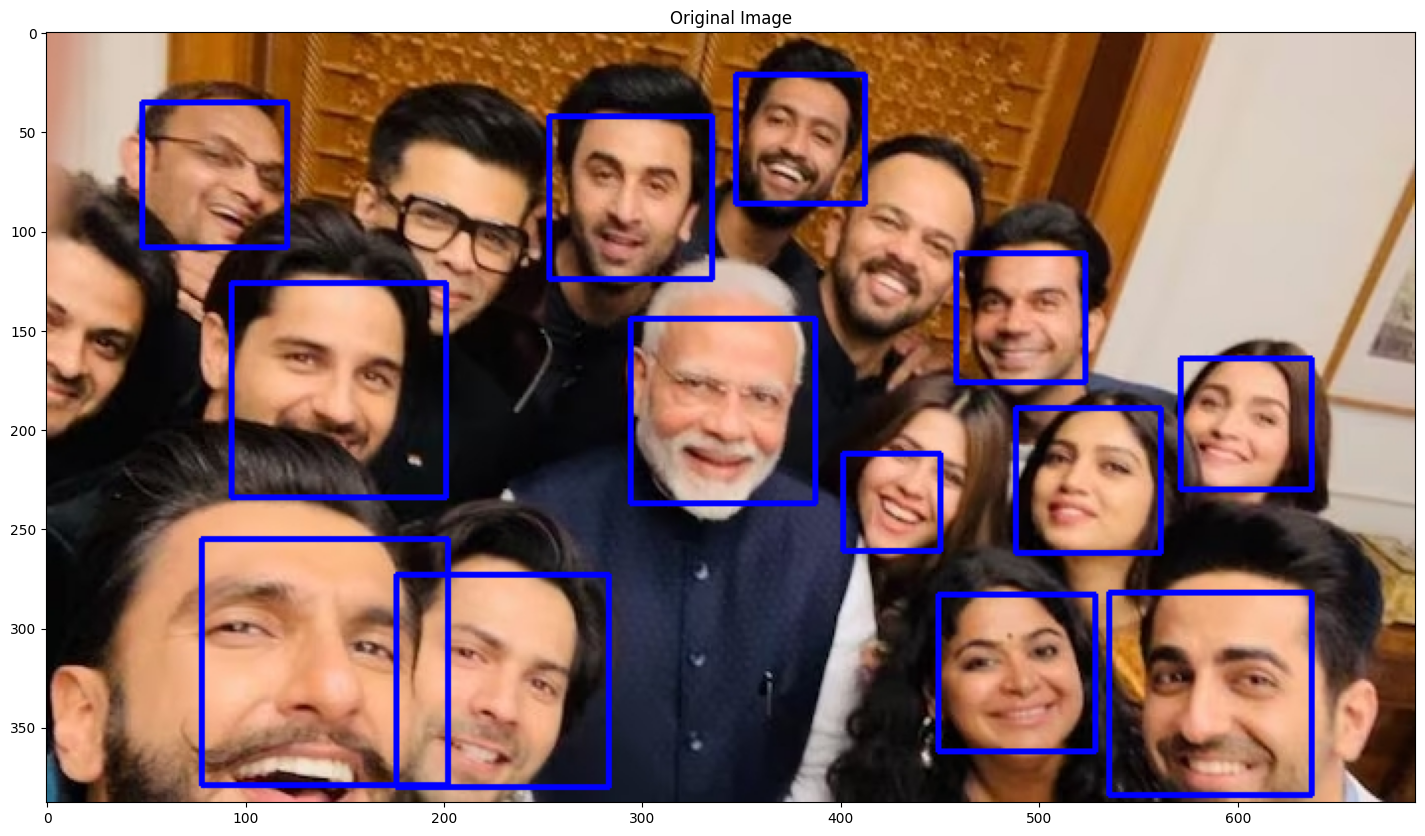

Number of pixels in the image: 267720
1/1 [==============================] - 0s 158ms/step


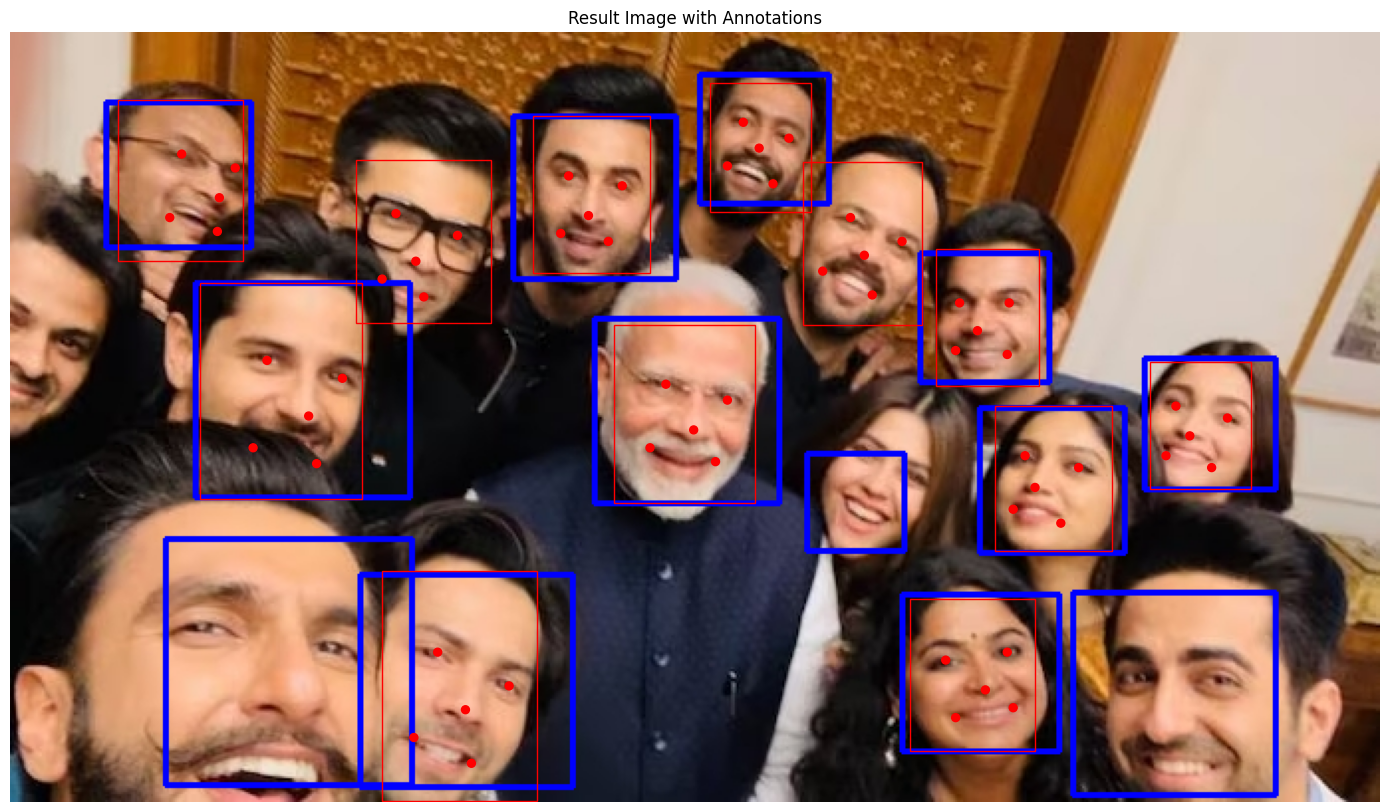

Prediction: [{'emotion': {'angry': 0.4736402438711829, 'disgust': 0.0001917817597702935, 'fear': 65.18373308375679, 'happy': 25.89209069107882, 'sad': 1.2122900642704888, 'surprise': 0.2791329187070824, 'neutral': 6.9589099933016305}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 48, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0}]
Prediction: [{'emotion': {'angry': 0.0001277592673432082, 'disgust': 1.5852899437618362e-06, 'fear': 0.0022946882381802425, 'happy': 99.8608410358429, 'sad': 0.006806274177506566, 'surprise': 2.8228363646576327e-06, 'neutral': 0.12992530828341842}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 48, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0}]
Prediction: [{'emotion': {'angry': 0.0016464848158648238, 'disgust': 2.26479210385655e-08, 'fear': 0.004579199230647646, 'happy': 99.47916269302368, 'sad': 0.03141110064461827, 'surprise': 5.491628485287947e-05, 'neutral': 0.4831458441913128}, 'do

In [29]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn import MTCNN
from deepface import DeepFace
from google.colab.patches import cv2_imshow

# Load Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load Image
image = cv2.imread('celeb.jpg')

# Convert image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Face Detection using Haar Cascade Classifier
faces_haar = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Store face data in a pandas DataFrame
face_data = pd.DataFrame(columns=['x', 'y', 'width', 'height'])
for (x, y, w, h) in faces_haar:
    face_data = face_data.append({'x': x, 'y': y, 'width': w, 'height': h}, ignore_index=True)

# Display Result with rectangles using OpenCV
for index, row in face_data.iterrows():
    x, y, w, h = row['x'], row['y'], row['width'], row['height']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Save the result image
cv2.imwrite('result_image.jpg', image)

# Display the result image using OpenCV
cv2_imshow(image)

# Function to calculate the total number of pixels in the image
def calculate_num_pixels(image):
    return image.shape[0] * image.shape[1]

# Function to detect facial expressions/emotions
# Function to detect facial expressions/emotions
def detect_emotions(image):
    emotions = []
    for result in faces_mtcnn:
        x, y, width, height = result['box']
        face_img = image[y:y+height, x:x+width]

        # Resize the face image to match the input size of the emotion detection model
        resized_face_img = cv2.resize(face_img, (48, 48))

        try:
            # Perform emotion prediction using the default DeepFace model
            prediction = DeepFace.analyze(resized_face_img, actions=['emotion'], enforce_detection=False)
            print("Prediction:", prediction)  # Add debugging statement
            emotion = max(prediction[0]['emotion'], key=prediction[0]['emotion'].get)
            emotions.append(emotion)
        except Exception as e:
            print(f"Error analyzing emotion: {e}")
            emotions.append("Unknown")

    return emotions

# Function to preprocess the image
def preprocess_image(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization for better contrast
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image



# Display Image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.title('Original Image')
plt.show()

# Calculate the total number of pixels in the image
num_pixels = calculate_num_pixels(image)
print("Number of pixels in the image:", num_pixels)

# Face Detection using MTCNN
detector = MTCNN()
faces_mtcnn = detector.detect_faces(image)

# Annotate the faces detected using MTCNN
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.axis('off')
ax.set_title('Face Detection using MTCNN')

for result in faces_mtcnn:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

    for _, value in result['keypoints'].items():
        dot = Circle(value, radius=2, color='red')
        ax.add_patch(dot)

# Display the result image with annotations
plt.axis('off')
plt.title('Result Image with Annotations')
plt.show()

# Detect facial expressions/emotions
emotions = detect_emotions(image)
print("Emotions detected:", emotions)
